In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\assignment\Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
## 

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.shape

(400, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [11]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [13]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features


Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [14]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [15]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

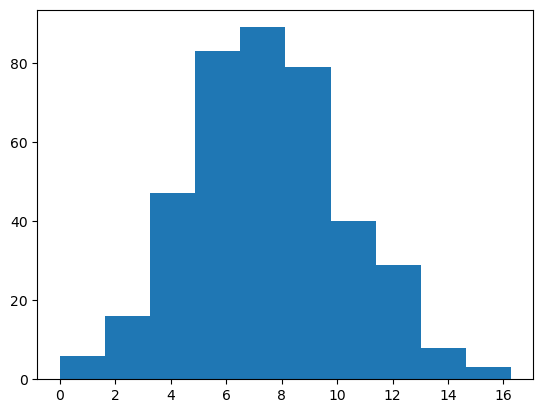

In [16]:
plt.hist('Sales',data=df)
plt.show()

In [17]:
df.Sales.max()

16.27

In [18]:
16.270000/3

5.423333333333333

In [19]:
5.423333333333333*2

10.846666666666666

In [20]:
5.423333333333333*3

16.27

In [21]:
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


## visualization

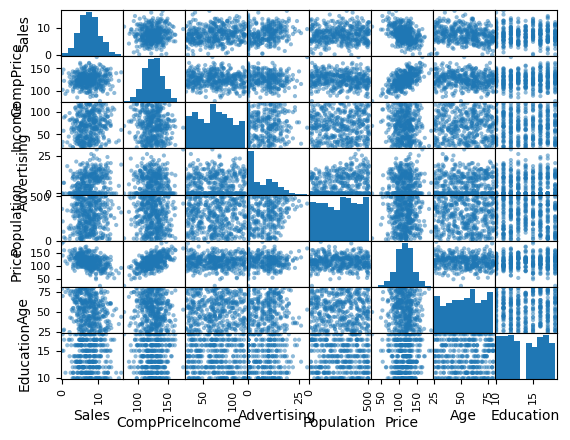

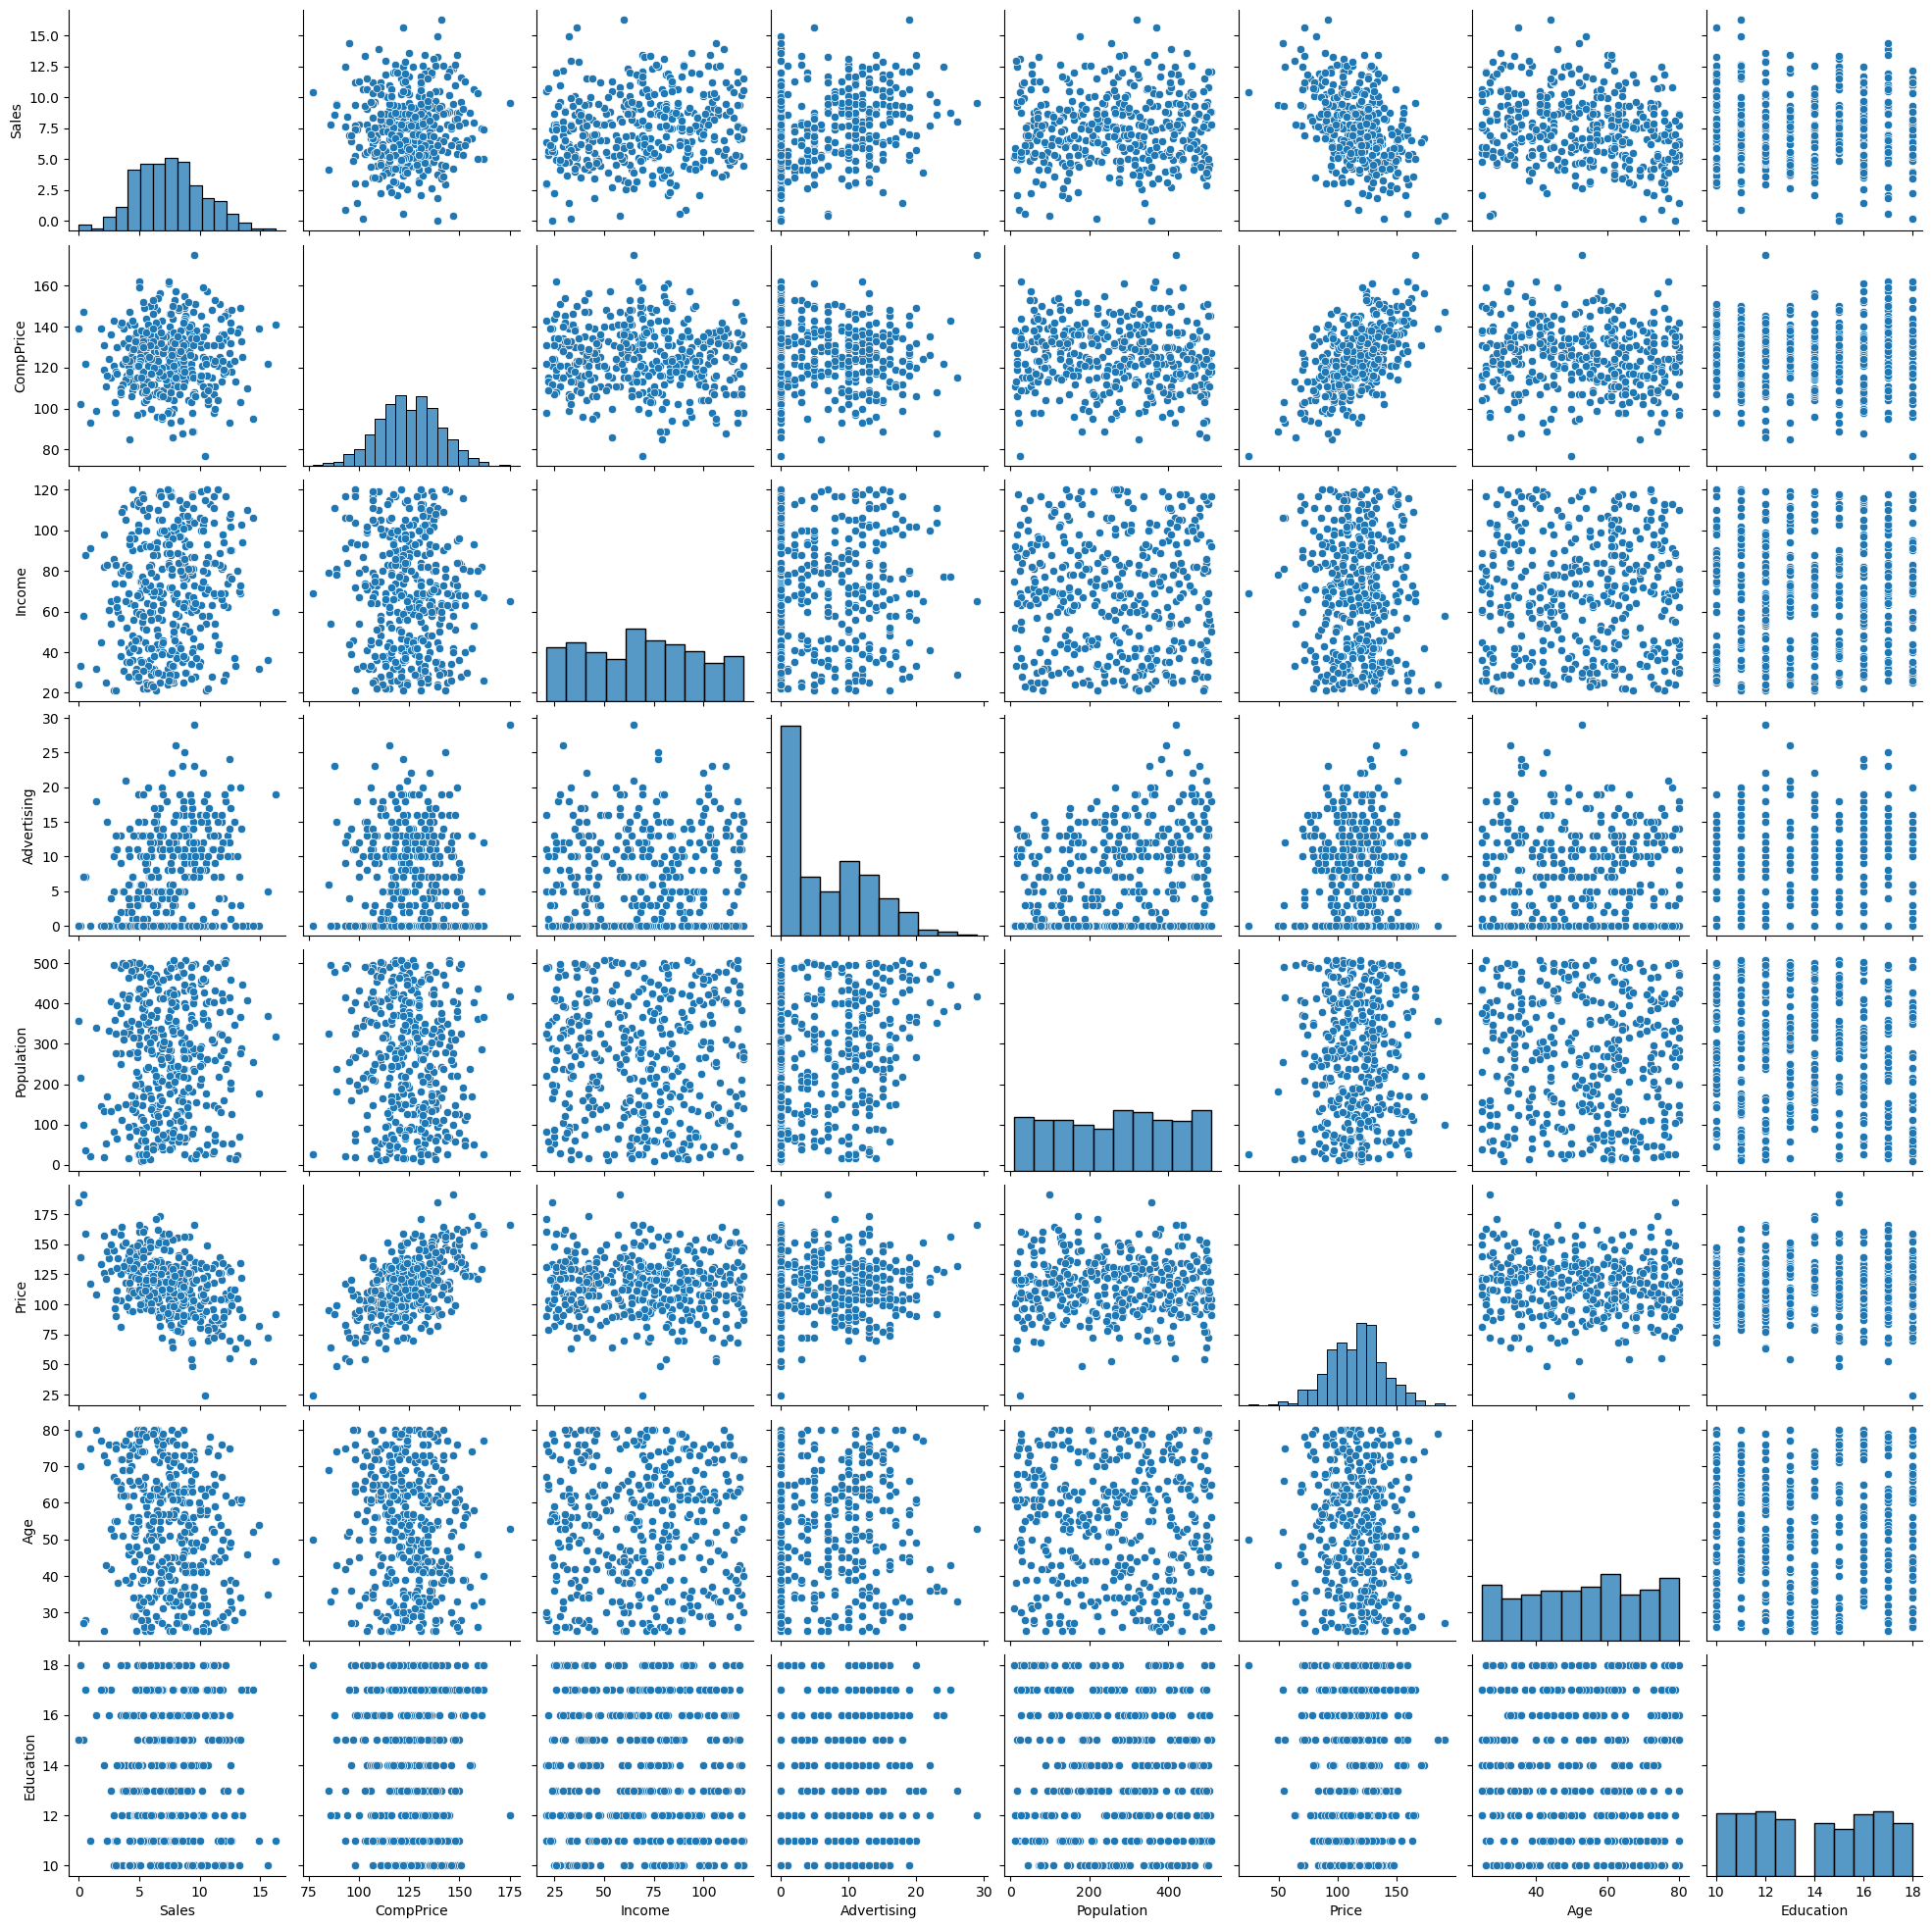

In [22]:
pd.plotting.scatter_matrix(df)
sns.pairplot(df)

In [23]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

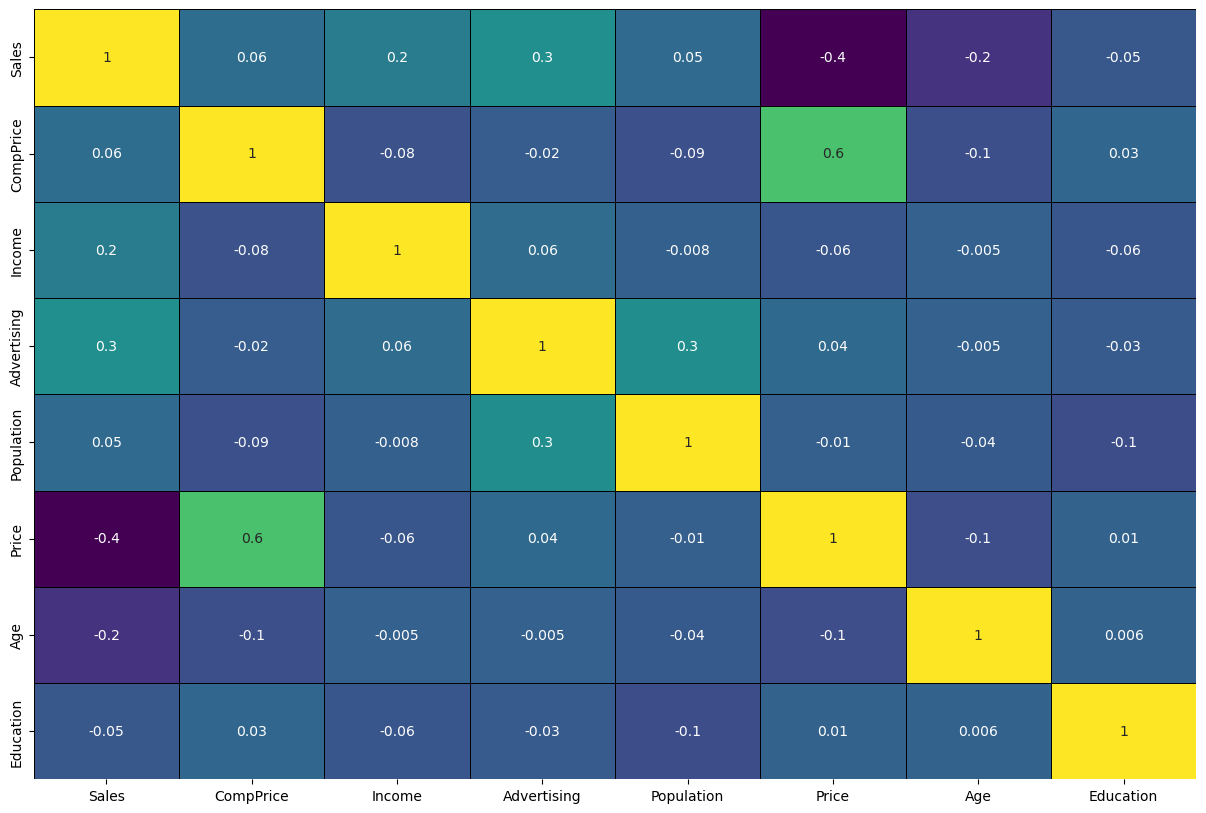

In [24]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

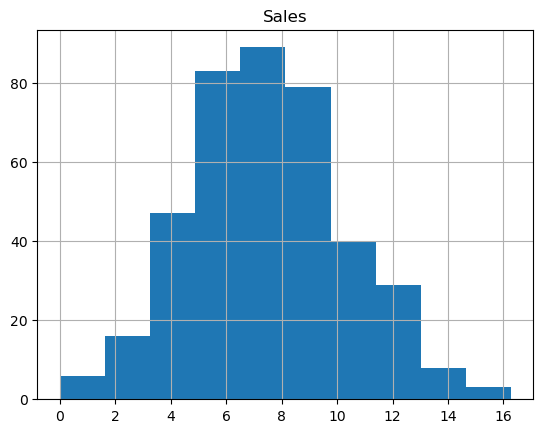

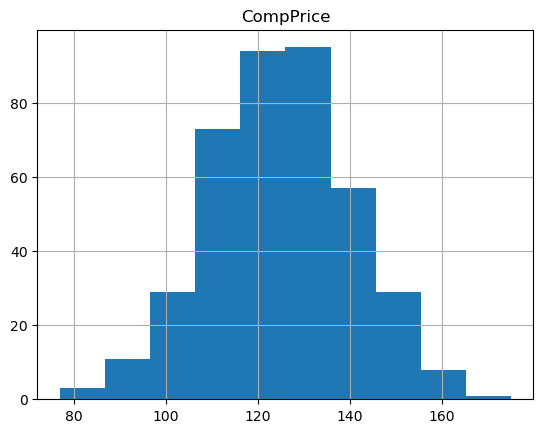

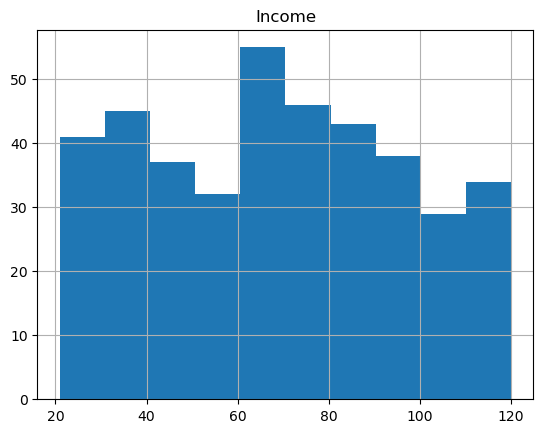

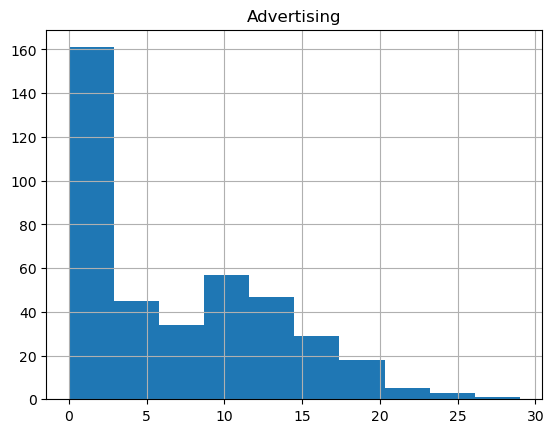

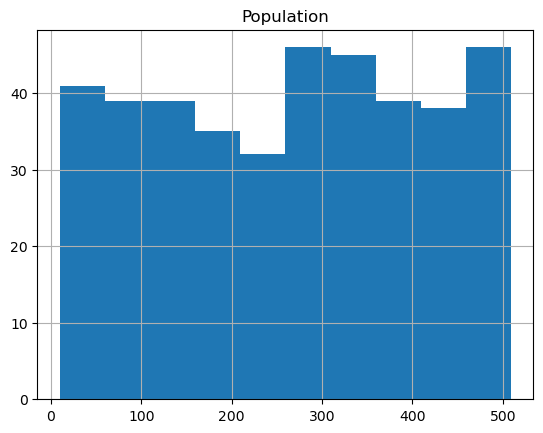

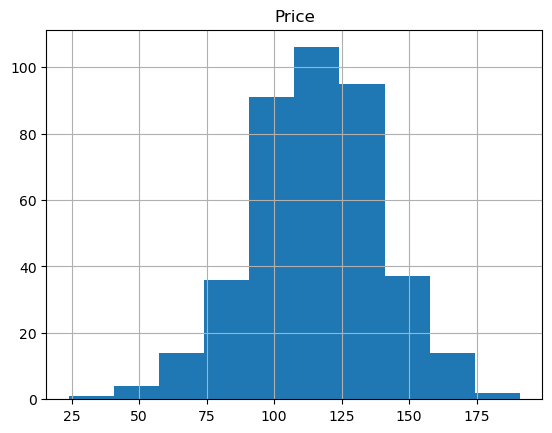

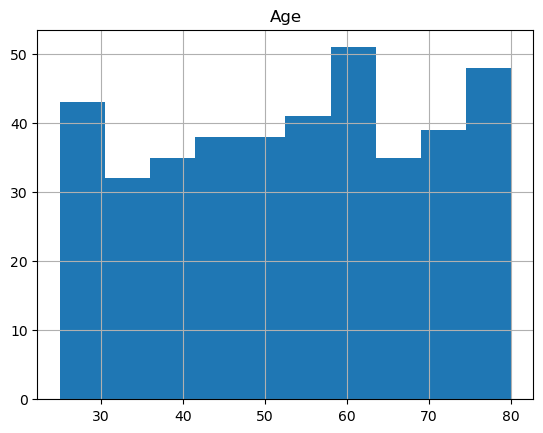

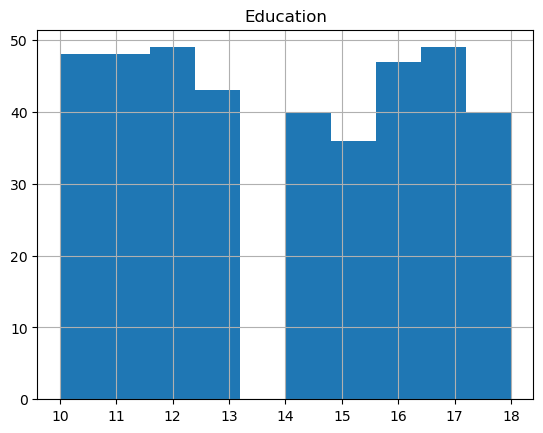

In [25]:
## histogram
for col_name in numerical_features.values:
    df.hist(column=col_name)

<AxesSubplot:>

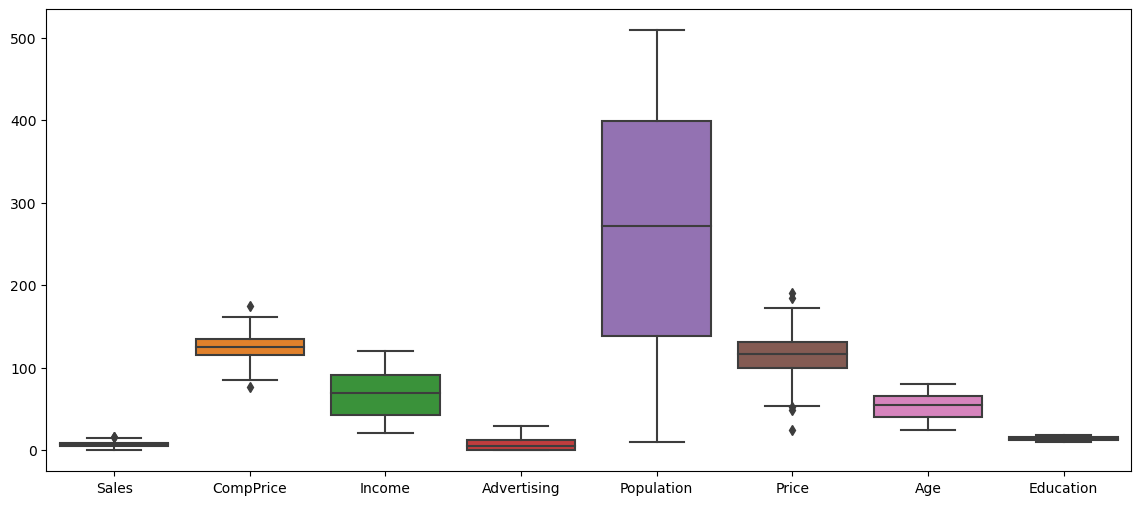

In [26]:
## check outliers using boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features])

<AxesSubplot:>

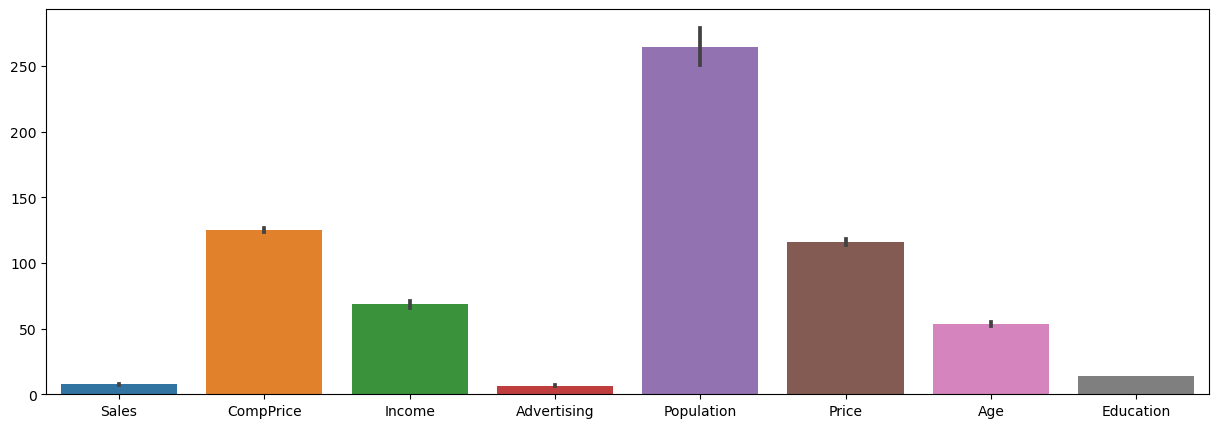

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df[numerical_features])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

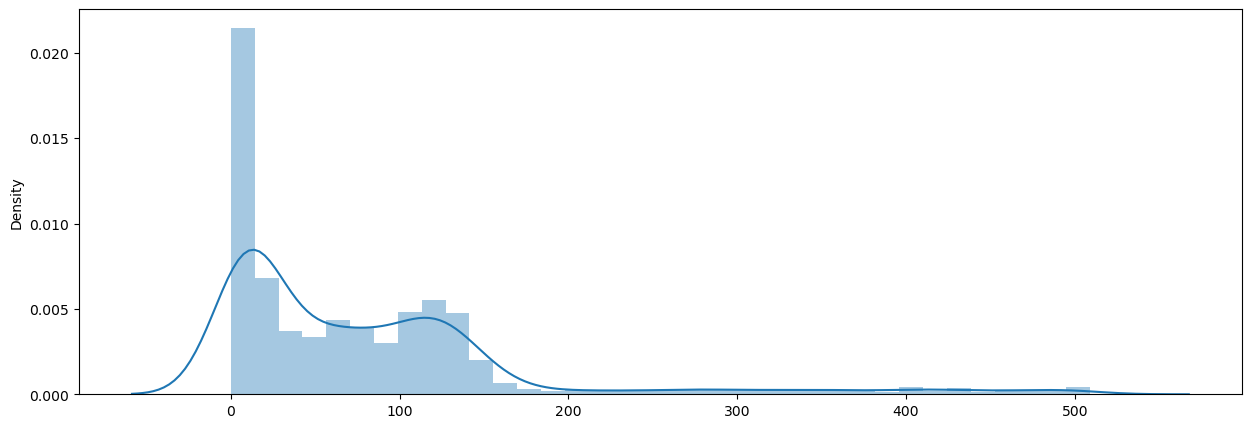

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(df[numerical_features])

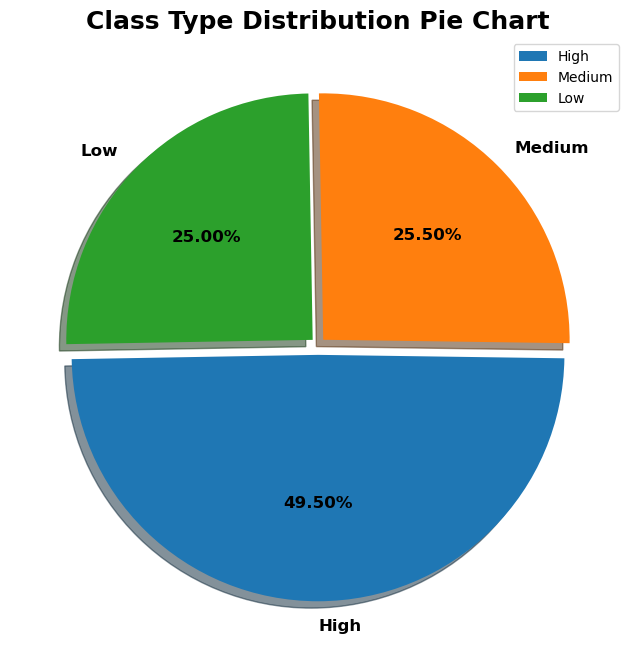

In [29]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),
       labels=df1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## Feature Selection Technique

### Data Pre-Processing

In [30]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [31]:
data_['Sales'] = df1.Sales_cat
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [32]:
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [33]:
# split into input (X) and output (y) variables
x = data_.iloc[:, :-1]

y=  data_.Sales

In [34]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [35]:
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales, Length: 400, dtype: int32

In [36]:
y.value_counts()

2    198
0    102
1    100
Name: Sales, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [38]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
199,122,88,5,335,126,64,14,0,0,1,0,1,0,1
43,123,42,11,16,134,59,13,0,0,1,0,1,0,1
307,138,92,0,13,120,61,12,1,0,0,0,1,1,0
166,119,67,17,151,137,55,11,0,0,1,0,1,0,1
64,100,67,12,184,104,32,16,0,0,1,1,0,0,1


In [39]:
y_train.head()

199    2
43     1
307    2
166    2
64     2
Name: Sales, dtype: int32

In [40]:
x_test.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
280,121,86,10,496,145,51,10,1,0,0,0,1,0,1
387,142,73,14,238,115,73,14,0,0,1,1,0,0,1
313,103,81,3,491,54,66,13,0,0,1,0,1,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
35,131,84,11,29,96,44,17,0,0,1,1,0,0,1


In [41]:
x_train.shape,y_train.shape

((320, 14), (320,))

In [42]:
x_test.shape,y_test.shape

((80, 14), (80,))

## MODEL BUILDING USING ENTROPY

In [43]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,random_state=12)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=12)

In [44]:
y_train_pred = rf_model.predict(x_train) 

In [45]:
accuracy_score(y_train,y_train_pred)

0.696875

In [46]:
confusion_matrix(y_train,y_train_pred)

array([[ 44,   0,  39],
       [  0,  29,  52],
       [  4,   2, 150]], dtype=int64)

In [47]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67        83
           1       0.94      0.36      0.52        81
           2       0.62      0.96      0.76       156

    accuracy                           0.70       320
   macro avg       0.82      0.62      0.65       320
weighted avg       0.78      0.70      0.67       320



In [48]:
y_test_pred = rf_model.predict(x_test)

In [49]:
accuracy_score(y_test,y_test_pred)

0.6375

In [50]:
confusion_matrix(y_test,y_test_pred)

array([[ 6,  0, 13],
       [ 0,  5, 14],
       [ 1,  1, 40]], dtype=int64)

In [51]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.83      0.26      0.40        19
           2       0.60      0.95      0.73        42

    accuracy                           0.64        80
   macro avg       0.76      0.51      0.53        80
weighted avg       0.71      0.64      0.59        80



## MODEL BUILDING USING GINI

In [52]:
rf_model2 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,random_state=0)
rf_model2.fit(x_train,y_train)


RandomForestClassifier(max_depth=7, random_state=0)

In [53]:
y_train_predict2 = rf_model2.predict(x_train)

In [54]:
accuracy_score(y_train,y_train_predict2)

0.95625

In [55]:
confusion_matrix(y_train,y_train_predict2)

array([[ 78,   0,   5],
       [  0,  72,   9],
       [  0,   0, 156]], dtype=int64)

In [56]:
print(classification_report(y_train,y_train_predict2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        83
           1       1.00      0.89      0.94        81
           2       0.92      1.00      0.96       156

    accuracy                           0.96       320
   macro avg       0.97      0.94      0.96       320
weighted avg       0.96      0.96      0.96       320



In [57]:
# testing data
y_test_pred2 = rf_model2.predict(x_test)

In [58]:
accuracy_score(y_test,y_test_pred2)

0.7

In [59]:
confusion_matrix(y_test,y_test_pred2)

array([[14,  1,  4],
       [ 0, 10,  9],
       [ 5,  5, 32]], dtype=int64)

In [60]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.62      0.53      0.57        19
           2       0.71      0.76      0.74        42

    accuracy                           0.70        80
   macro avg       0.69      0.68      0.68        80
weighted avg       0.70      0.70      0.70        80



## RandamizedSearch CV

In [79]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [80]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}


In [81]:
rf_clf = RandomForestClassifier(random_state=42)

In [82]:
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})


In [99]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=195)

In [100]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=195,
                       random_state=42)

In [112]:
y_train_predict3 = rf_cv.predict(x_train)

In [114]:
accuracy_score(y_train,y_train_predict3)

0.884375

In [115]:
confusion_matrix(y_train,y_train_predict3)

array([[ 70,   0,  13],
       [  0,  63,  18],
       [  2,   4, 150]], dtype=int64)

In [116]:
print(classification_report(y_train,y_train_predict3))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        83
           1       0.94      0.78      0.85        81
           2       0.83      0.96      0.89       156

    accuracy                           0.88       320
   macro avg       0.91      0.86      0.88       320
weighted avg       0.89      0.88      0.88       320



In [117]:
# testing data
y_test_pred4 = rf_cv.predict(x_test)

In [118]:
accuracy_score(y_test,y_test_pred4)

0.65

In [119]:
confusion_matrix(y_test,y_test_pred4)

array([[ 9,  0, 10],
       [ 0, 10,  9],
       [ 4,  5, 33]], dtype=int64)

In [120]:
print(classification_report(y_test,y_test_pred4))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.67      0.53      0.59        19
           2       0.63      0.79      0.70        42

    accuracy                           0.65        80
   macro avg       0.66      0.60      0.62        80
weighted avg       0.66      0.65      0.64        80



## Accracy after hyperparameter randamized searh cv  is 65%